In [1]:
import cv2 as cv
face_classifier = cv.CascadeClassifier('desktop/data/haarcascade_frontalface_default2.xml')
eye_classifier = cv.CascadeClassifier('desktop/data/haarcascade_eye.xml')

def detect_body(img, box=True, classifier=eye_classifier):
    '''a function to detect either eye or face based on what you specify in classifier argument, default is eye classifier'''
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY) #we convert image color to gray to reduce pixels for faster execution
    body_part = classifier.detectMultiScale(img, scaleFactor=1.03, minNeighbors=10,) #returns a list of rectangle
    
    for (x,y,w,h) in body_part:
        coords, ebox = [], []
        if box:
            cv.rectangle(img, (x,y), (x+w, y+h), (255,0,255), 4)
    coords = [x,y,w,h]
    box = img[y:y+h, x:x+w]
    return img, coords, box





        
    

(-0.5, 1439.5, 959.5, -0.5)

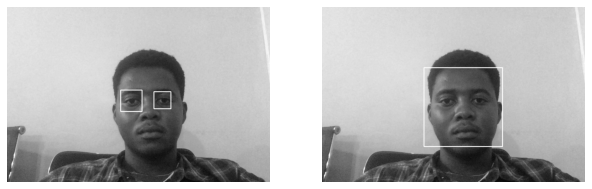

In [3]:
import matplotlib.pyplot as plt
#plotting both eyes and face detectionn
plt.figure(figsize=[16,12])


plt.subplot(231)
img = cv.imread('desktop/true_img.jpg') 
img, coords, box = detect_body(img) #default classifier detect the eye
plt.imshow(img,cmap='gray')
plt.axis('off')


plt.subplot(232)
img = cv.imread('desktop/true_img.jpg')
img, coords, box = detect_body(img, classifier=face_classifier)#classifier to detect face
plt.imshow(img,cmap='gray')
plt.axis('off')